Algerian Forest Dataset Link: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

`Dataset contains 2 other sub datasets`


In [7]:
import numpy as np
import pandas as pd
from fcmeans import FCM
import seaborn as sns
import skfuzzy
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from cvxopt import matrix, solvers

In [8]:
data = pd.read_csv("Algerian_forest_fires_dataset.csv", skiprows=1)
print(data.columns)
data.isnull().sum()


Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')


day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [9]:
data.describe(include="all")

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244,244.000000,244.000000,244,243
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198,NaN,NaN,127,8
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,0.4,fire
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,12,131
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,NaN,4.774180,16.664754,NaN,NaN
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,NaN,4.175318,14.204824,NaN,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,NaN,0.000000,1.100000,NaN,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,NaN,1.400000,6.000000,NaN,NaN
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,NaN,3.500000,12.250000,NaN,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,NaN,7.300000,22.525000,NaN,NaN


In [10]:
data.head(124)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [436]:
# Removing name and columns names of the second dataset
# data = data.drop(labels=122, axis=0)
# data = data.drop(labels=123, axis=0)


In [11]:
data = data.dropna()
print(data.isnull().sum())
data.shape


day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64


(243, 14)

In [12]:
target = data["Classes  "]
data = data.drop(columns=["day","month", "year", "Classes  "])

In [13]:
print("Before: ", target.unique())
target = target.str.replace("  ", "")
target = target.str.replace(" ", "")
print("After: ", target.unique())

Before:  ['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']
After:  ['notfire' 'fire']


<AxesSubplot:>

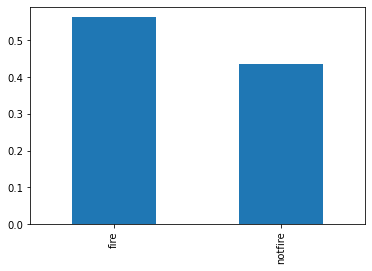

In [14]:
(target.value_counts()/len(target)).plot.bar()

In [15]:
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [16]:
X = data.to_numpy()
X = X.astype("float")
X

array([[29. , 57. , 18. , ...,  1.3,  3.4,  0.5],
       [29. , 61. , 13. , ...,  1. ,  3.9,  0.4],
       [26. , 82. , 22. , ...,  0.3,  2.7,  0.1],
       ...,
       [27. , 87. , 29. , ...,  0.4,  3.4,  0.2],
       [24. , 54. , 18. , ...,  1.7,  5.1,  0.7],
       [24. , 64. , 15. , ...,  1.2,  4.8,  0.5]])

In [17]:
scaledX = MinMaxScaler().fit_transform(X)


In [18]:
# Mapping Target
target = (target == "fire").astype(int)
y = target.to_numpy()

In [43]:
# c =2

fcm = FCM(n_clusters=2, m=4,random_state=20)
fcm.fit(scaledX)
fcm_centers = fcm.centers
fcm_labels = fcm.soft_predict(scaledX)

In [44]:
print("Centers: ", fcm_centers)
print("Labels: ", fcm_labels)


Centers:  [[0.43544961 0.67344598 0.41369059 0.0604074  0.63951166 0.11826515
  0.09710049 0.13492502 0.12563145 0.0929369 ]
 [0.59771198 0.50371264 0.41091402 0.01799307 0.84483798 0.32617368
  0.32066956 0.38880255 0.35909781 0.38932787]]
Labels:  [[0.66609711 0.33390289]
 [0.68069837 0.31930163]
 [0.56298014 0.43701986]
 [0.58184731 0.41815269]
 [0.67111072 0.32888928]
 [0.68443377 0.31556623]
 [0.49038691 0.50961309]
 [0.55489074 0.44510926]
 [0.60830409 0.39169591]
 [0.64864618 0.35135382]
 [0.55543872 0.44456128]
 [0.54360646 0.45639354]
 [0.61381474 0.38618526]
 [0.6523128  0.3476872 ]
 [0.62945767 0.37054233]
 [0.59615371 0.40384629]
 [0.59934069 0.40065931]
 [0.65819369 0.34180631]
 [0.65738127 0.34261873]
 [0.67217169 0.32782831]
 [0.67464888 0.32535112]
 [0.71398474 0.28601526]
 [0.62094123 0.37905877]
 [0.49755553 0.50244447]
 [0.44468031 0.55531969]
 [0.37606451 0.62393549]
 [0.28142058 0.71857942]
 [0.27867354 0.72132646]
 [0.47472575 0.52527425]
 [0.2665679  0.7334321 ]


In [45]:
cuts = skfuzzy.lambda_cut(fcm_labels, lcut=0.5)
# list(cuts[:,1]) == [ 1 if x > 0.5 else 0 for x in  list(model_labels[:,1])]
cuts = cuts[:, 1]

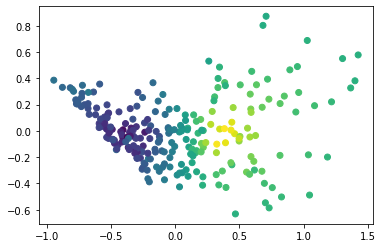

In [22]:
from sklearn.decomposition import PCA
"""
we are using PCA to reduce the data dimensionality so we can plot it in a 2-d graph 
"""
pca = PCA(n_components=2)

pca.fit(scaledX)

d2 = pca.transform(scaledX)

plt.scatter(d2[:, 0], d2[:, 1], c=fcm_labels[:, 1])
plt.show()

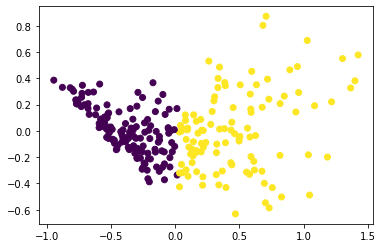

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(scaledX)

d2 = pca.transform(scaledX)

plt.scatter(d2[:, 0], d2[:, 1], c=cuts)

d:\Users\miret\anaconda3\envs\uni\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


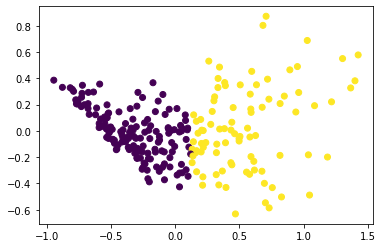

In [24]:
kmeans = KMeans(n_clusters=2,random_state=20)
# np.random.seed(20)
kmeans.fit(scaledX)
plt.scatter(d2[:, 0], d2[:, 1], c= kmeans.labels_ )
plt.show()


In [25]:
from sklearn.metrics import accuracy_score

print("Accuracy for FCM: ", accuracy_score(target, cuts))
print("Accuracy for KMeans: ", accuracy_score(target, kmeans.labels_))


Accuracy for FCM:  0.8353909465020576
Accuracy for KMeans:  0.7901234567901234


## Fuzzy SVM

Kernels

In [26]:
import numpy as np    
# For optimization
from scipy.optimize import Bounds, BFGS                     
from scipy.optimize import LinearConstraint, minimize   
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# For generating dataset
import sklearn.datasets as dt

ZERO = 1e-7


In [37]:
def plot_x(x, t, alpha=[], C=0):
    sns.scatterplot(x=d2[:,0], y=d2[:, 1], style=cuts,
    hue=cuts, markers=['s', 'P'],
    palette=['magenta', 'green'])
    if len(alpha) > 0:
        alpha_str = np.char.mod('%.1f', np.round(alpha, 1))
        ind_sv = np.where(alpha > ZERO)[0]
        for i in ind_sv:   
            plt.gca().text(d2[i,0], d2[i, 1]-.25, alpha_str[i] )

# Objective function
def lagrange_dual(alpha, x, t):
    result = 0
    ind_sv = np.where(alpha > ZERO)[0]
    for i in ind_sv:
        for k in ind_sv:
            result = result + alpha[i]*alpha[k]*t[i]*t[k]*np.dot(x[i, :], x[k, :]) 
    result = 0.5*result - sum(alpha)     
    return result 
    
def mem_func(X):
    return np.max(fcm.soft_predict(X), axis=-1)

def optimize_alpha(x, t, C):
    m, n = x.shape
    np.random.seed(1)
    # Initialize alphas to random values
    alpha_0 = np.random.rand(m)*C
    # Define the constraint
    linear_constraint = LinearConstraint(t, [0], [0])
    # Define the bounds
    bounds_alpha = Bounds(np.zeros(m), np.full(m, C)*mem_func(x))
    # Find the optimal value of alpha
    result = minimize(lagrange_dual, alpha_0, args = (x, t), method='trust-constr', 
                      hess=BFGS(), constraints=[linear_constraint],
                      bounds=bounds_alpha)
    # The optimized value of alpha lies in result.x
    alpha = result.x
    return alpha

def get_w(alpha, t, x):
    m = len(x)
    # Get all support vectors
    w = np.zeros(x.shape[1])
    for i in range(m):
        w = w + alpha[i]*t[i]*x[i, :]        
    return w

def get_w0(alpha, t, x, w, C):
    C_numeric = C-ZERO
    # Indices of support vectors with alpha<C
    ind_sv = np.where((alpha > ZERO)&(alpha < C_numeric))[0]
    w0 = 0.0
    for s in ind_sv:
        w0 = w0 + t[s] - np.dot(x[s, :], w)
    # Take the average    
    w0 = w0 / len(ind_sv)
    return w0

def classify_points(x_test, w, w0):
    # get y(x_test)
    predicted_labels = np.sum(x_test*w, axis=1) + w0
    predicted_labels = np.sign(predicted_labels)
    # Assign a label arbitrarily a +1 if it is zero
    predicted_labels[predicted_labels==0] = 1
    return predicted_labels

def misclassification_rate(labels, predictions):
    total = len(labels)
    errors = sum(labels != predictions)
    return errors/total*100

def plot_hyperplane(w, w0):
    x_coord = np.array(plt.gca().get_xlim())
    y_coord = -w0/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, y_coord, color='red')

def plot_margin(w, w0):
    x_coord = np.array(plt.gca().get_xlim())
    ypos_coord = 1/w[1] - w0/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, ypos_coord, '--', color='green') 
    yneg_coord = -1/w[1] - w0/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, yneg_coord, '--', color='magenta')  

def display_SVM_result(x, t, C):
    # Get the alphas
    alpha = optimize_alpha(x, t, C)   
    # Get the weights
    w = get_w(alpha, t, x)
    w0 = get_w0(alpha, t, x, w, C)
    plot_x(x, t, alpha, C)
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    plot_hyperplane(w, w0)
    plot_margin(w, w0)
    plt.xlim(xlim)
    plt.ylim(ylim)
    # Get the misclassification error and display it as title
    predictions = classify_points(x, w, w0)
    err = misclassification_rate(t, predictions)
    title = 'C = ' + str(C) + ',  Errors: ' + '{:.1f}'.format(err) + '%'
    title = title + ',  total SV = ' + str(len(alpha[alpha > ZERO]))
    plt.title(title)

In [50]:
labels = np.array([-1 if cuts[i] == 0 else 1 for i in range(len(cuts))])
labels

array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1

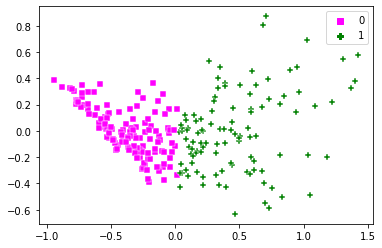

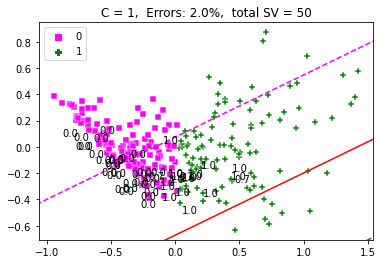

<Figure size 576x1800 with 0 Axes>

In [58]:
plot_x(d2, fcm_labels)
plt.show()
display_SVM_result(scaledX[:50], labels[:50], 1)    
plt.show()

fig = plt.figure(figsize=(8,25))

i=0
C_array = [1]

# for C in C_array:
#     fig.add_subplot(311+i)    
#     display_SVM_result(scaledX[:10], labels[:10], C)  
#     i = i + 1